# Simulating the measurement-free GKP state preparation protocol with cavity QED
From Hastrup, J., Park, K., Brask, J.B. et al. Measurement-free preparation of grid states. npj Quantum Inf 7, 17 (2021). https://doi.org/10.1038/s41534-020-00353-3

## Theoretical description

The grid-state preparation protocol consists of $M$ steps of 3 gates, $\hat{U}_k$, $\hat{V}_k$, and $\hat{W}_k$, where $k\in\{1,\dots,M\}$. Each gate takes time $T$ to implement, and is activated by the gate activation functions $f_k(t)$, $g_k(t)$, and $h_k(t)$, which have a square pulse shape. 
The Hamiltonian of the cavity-atom system is

$\hat{H} = \hat{H}_0 + \sum_{k=1}^M \left[f_k(t)\hat{U}_k+ g_k(t)\hat{V}_k + h_k(t)\hat{W}_k\right]$ 

where the free energy is $\hat{H}_0=\hbar\frac{\omega_a}{2}\hat{\sigma}_z + \hbar\omega_c \hat{a}^\dagger \hat{a}$, the preparation gate is $\hat{U}_k = u_k \hat{x}\hat{\sigma}_y$, the displacement gate is $\hat{V}_k = v_k \hat{p}\hat{\sigma}_x$, and the disentangling gate is $\hat{W}_k = w_k \hat{x}\hat{\sigma}_y$. 

The gates are parameterized by $u_k$, $v_k$ and $w_k$, and the values are taken from Hastrup *et al.* (2021), see `definitions.py`.  

We use `qutip.mesolve` to solve the Langevin Master equation for the system, with the option of including the noise sources listed in Hastrup *et al.* (2021) (boson loss, boson dephasing, boson heating, qubit loss, and qubit dephasing). 



## How to use this package
System parameters e.g. operators are set in `definitions.py`. You can change the photon number basis cutoff there. 

In [1]:
%load_ext line_profiler
from definitions import *

print('The photon number cutoff:', N)
print(ad)

The photon number cutoff: 70
Quantum object: dims=[[2, 70], [2, 70]], shape=(140, 140), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.41421356 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 8.24621125 0.         0.        ]
 [0.         0.         0.         ... 0.         8.30662386 0.        ]]


The main object you will use is `SimulateGKP` the class. Upon initialisation, it has some default settings.

In [2]:
from simulator import SimulateGKP

In [3]:
gkp = SimulateGKP()

print(gkp.gate_settings)
print(gkp.noise_settings)

{'M': 1, 'T': 2, 'dT': 2, 'Tdelay': 18, 'z': 3.141592653589793}
{'boson loss': 0, 'boson dephasing': 0, 'boson heating': [0, 0], 'qubit loss': 0, 'qubit dephasing': 0}


### Setting your own simulation parameters and viewing the gate activation functions

In [4]:
#Setup simulation parameters 

#Activation functions
M = 3
T = 6
dT = 2
Tdelay = 3*T+3*dT
z = 100
gate_settings = {'M': M, 'T': T, 'dT': dT, 'Tdelay': Tdelay, 'z': z}

#Noise
gamma_bl = 0
gamma_bdp = 0
gamma_c = 0
nbar = 0
gamma_ql = 0
gamma_qdp = 0

noise_settings = {'boson loss': gamma_bl, 'boson dephasing': gamma_bdp, 'boson heating': [gamma_c, nbar], 
         'qubit loss': gamma_ql, 'qubit dephasing': gamma_qdp}


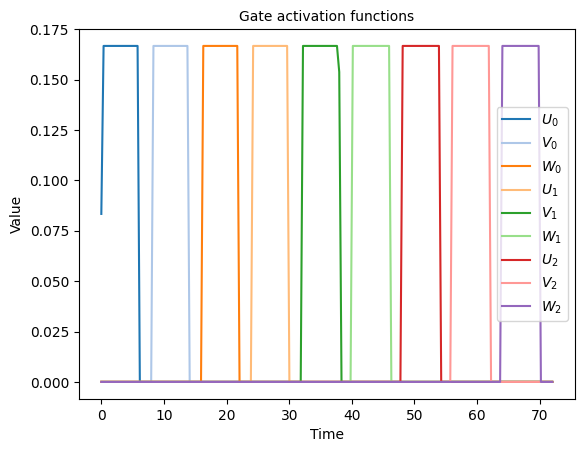

In [5]:
GKP = SimulateGKP(gate_settings=gate_settings, noise_settings=noise_settings)
GKP.show_gate_settings()

### Running the simulation

In [6]:
GKP.run_sim()
print(GKP.res)

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.000244140625
    preparation time: 0.00016808509826660156
    run time: 0.08967208862304688
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 72.0] (200 steps)
  Number of e_ops: 0
  States saved.
>


### Showing the time evolution of the cavity field
First, compute the Wigner function in each time step, which can take a bit of time. 

In [7]:
GKP.compute_wigner()

In [8]:
print(len(GKP.wigner))

200


In [9]:
from plotting import make_sim_plot

import ipywidgets as widgets
from ipywidgets import interact, IntSlider

In [10]:
interact(make_sim_plot, SimGKP=widgets.fixed(GKP), time_index=IntSlider(0,0,len(GKP.res.times)-1,1))

interactive(children=(IntSlider(value=0, description='time_index', max=199), Output()), _dom_classes=('widget-…

<function plotting.make_sim_plot(SimGKP, time_index)>